In [38]:
# A couple requried imports
from glob import glob 
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm
from tifffile import imread, TiffFile
from skimage import io


# Importing the deep learning framework
from csbdeep.models import CARE, Config

from csbdeep.utils import plot_some, plot_history, Path

In [40]:
base_dir = r'D:\GautamDey\2020\Fast Nup imaging\separate for denoising'
base_path = Path(base_dir)
C1_path = Path(base_path/r'C1'/r'raw data')
C2_path = Path(base_path/r'C2'/r'raw data')

C1_files = sorted(C1_path.rglob('*.tif'))
C2_files = sorted(C2_path.rglob('*.tif'))

save_dir_C2 = C2_path/f'results'
save_dir_C2.mkdir(exist_ok=True)

print(f'There are {len(C1_files)} channel 1 files and {len(C2_files)} channel 2 files')

There are 42 channel 1 files and 21 channel 2 files


In [41]:
#C1_ims = []
#C1_names = []
C2_ims = []
C2_names = []
#for file in C1_files:
#    C1_names.append(file.stem)
#    T1 = imread(str(file))
#    C1_ims.append(T1)
for file in tqdm(C2_files):
    C2_names.append(file.stem)
    T2 = imread(str(file))
    C2_ims.append(T2)


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:26<00:00,  1.29s/it]


In [43]:
model = CARE(config=None, name='noise2noise_cut11', basedir='models')

Loading network weights from 'weights_best.h5'.


In [44]:
def normalize(img, mean, std):
    return (img - mean)/std

def denormalize(img, mean, std):
    return (img * std) + mean

In [29]:
denoised_1 = []
for frame in tqdm(C1_ims[0]):
    mean = np.mean(frame)
    std = np.std(frame)
    pred = denormalize(model.predict(normalize(frame, mean, std), axes='YX', normalizer=None), mean, std)
    denoised_1.append(pred)

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:47<00:00,  2.54it/s]


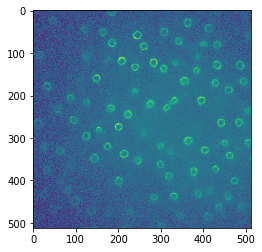

In [46]:
plt.imshow(denoised_2[0])

In [48]:
counter = 0
for T in tqdm(C2_ims):
    denoised_2 = []
    for frame in T:
        mean = np.mean(frame)
        std = np.std(frame)
        pred = denormalize(model.predict(normalize(frame, mean, std), axes='YX', normalizer=None), mean, std)
        denoised_2.append(pred)
    io.imsave(f'{save_dir_C2}/{C2_names[counter]}.tif', np.asarray(denoised_2))
    counter+=1



  0%|                                                                                           | 0/21 [00:00<?, ?it/s]

  5%|███▉                                                                               | 1/21 [01:33<31:19, 93.97s/it]

 10%|███████▊                                                                          | 2/21 [05:48<45:02, 142.23s/it]

 14%|███████████▋                                                                      | 3/21 [11:11<58:54, 196.37s/it]

 19%|███████████████▏                                                                | 4/21 [16:55<1:08:12, 240.71s/it]

 24%|███████████████████                                                             | 5/21 [23:01<1:14:11, 278.21s/it]

 29%|██████████████████████▊                                                         | 6/21 [26:51<1:05:57, 263.80s/it]

 33%|███████████████████████████▎                                                      | 7/21 [29:32<54:20, 232.87s/it]

 38%|█████████████████████████

In [47]:
C2_names = []
#for file in C1_files:
#    C1_names.append(file.stem)
#    T1 = imread(str(file))
#    C1_ims.append(T1)
for file in tqdm(C2_files):
    C2_names.append(file.stem)



100%|██████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<?, ?it/s]
